In [131]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input,AveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.xception import Xception
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
#input_dir =  '/content/drive/My Drive/Colab Notebooks/Nature/Nature'
input_dir = r'C:\Users\sweta\OneDrive\Documents\GSU\Machine Learning\Final Proj\Image\Nature\Nature'

In [3]:
trainingset = pd.read_csv(input_dir + '/Nature_Training_Set.csv')
print(trainingset.size)
trainingset.head()

30000


,FileName,Label
0,45945143,12
1,13822720,13
2,29401262,24
3,75265681,20
4,28008132,29


In [4]:
trainingset['FileName'] = trainingset['FileName'].apply(lambda x: str(x) + '.jpg')
trainingset['Label'] = trainingset['Label'].apply(lambda x: str(x))
trainingset.head()

,FileName,Label
0,45945143.jpg,12
1,13822720.jpg,13
2,29401262.jpg,24
3,75265681.jpg,20
4,28008132.jpg,29


<AxesSubplot:xlabel='Label', ylabel='TrainingImages'>

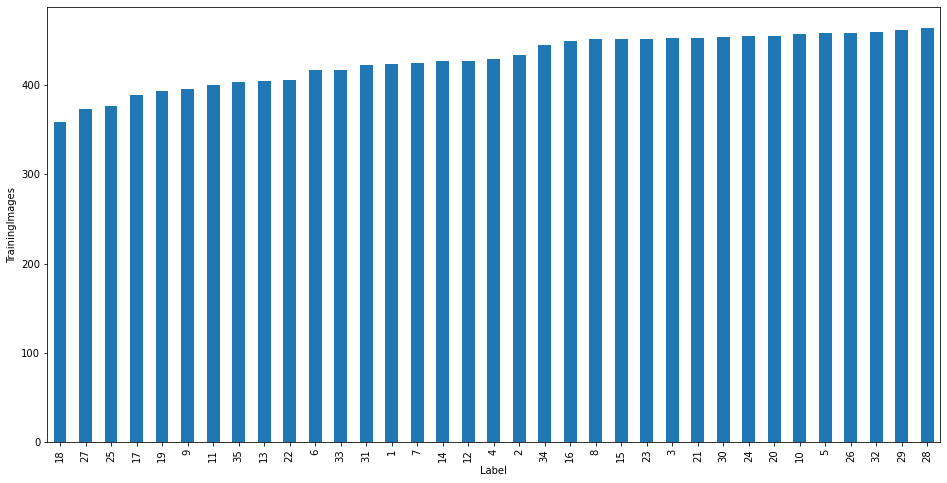

In [5]:
trainingset['Label'].value_counts().sort_values().plot.bar(figsize=(16, 8),xlabel = 'Label',ylabel = 'TrainingImages',)

In [6]:
data_generator = ImageDataGenerator(rescale= 1./255, validation_split=0.2, rotation_range=20,
                                    zoom_range=0.1, width_shift_range=0.2, height_shift_range=0.2,
                                    shear_range=0.1, horizontal_flip=True, fill_mode="nearest")

In [7]:
SEED = 23
SIZE = (224, 224)
BATCH_SIZE = 64
train_generator = data_generator.flow_from_dataframe(trainingset, directory= input_dir + "/Train Files", x_col='FileName', y_col='Label', target_size=SIZE, class_mode='categorical', batch_size=BATCH_SIZE, shuffle=True, seed=SEED, subset='training')
val_generator = data_generator.flow_from_dataframe(trainingset, directory=input_dir + "/Train Files", x_col='FileName', y_col='Label', target_size=SIZE, class_mode='categorical', batch_size=BATCH_SIZE, shuffle=True, seed=SEED, subset='validation')

Found 12000 validated image filenames belonging to 35 classes.
Found 3000 validated image filenames belonging to 35 classes.


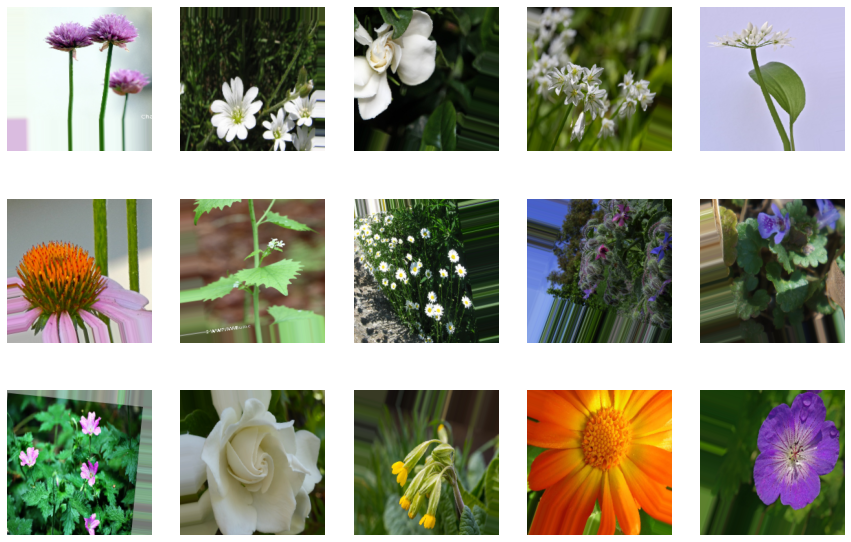

In [8]:
img, label = next(train_generator)

fig = plt.figure(figsize=(15, 10))

for i in range(15):
    fig.add_subplot(3, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=10)
checkpoint = ModelCheckpoint(filepath = '/content/drive/My Drive/Colab Notebooks/Nature/Nature/xweights1.hdf5', verbose=1, save_best_only=True)

In [9]:
base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [11]:
for layer in base_model.layers[len(base_model.layers)//2:]:
    layer.trainable = True

In [12]:
trainmodel = AveragePooling2D(pool_size=(4, 4))(base_model.output)
trainmodel = Flatten(name='flatten')(trainmodel)
trainmodel = Dense(1024, activation='relu')(trainmodel)
trainmodel = Dropout(0.3)(trainmodel)
trainmodel = Dense(512, activation='relu')(trainmodel)
trainmodel = Dropout(0.3)(trainmodel)
trainmodel = Dense(35, activation='softmax')(trainmodel)

In [13]:
model = Model(inputs=base_model.input, outputs=trainmodel)
optimizer = SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [15]:
test1 = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 1.7975 - accuracy: 0.5128 
Epoch 1: val_loss improved from inf to 0.75122, saving model to /content/drive/My Drive/Colab Notebooks/Nature/Nature/xweights1.hdf5
188/188 [==============================] - 2994s 16s/step - loss: 1.7975 - accuracy: 0.5128 - val_loss: 0.7512 - val_accuracy: 0.7717
Epoch 2/10
188/188 [==============================] - ETA: 0s - loss: 0.4815 - accuracy: 0.8622
Epoch 2: val_loss improved from 0.75122 to 0.46758, saving model to /content/drive/My Drive/Colab Notebooks/Nature/Nature/xweights1.hdf5
188/188 [==============================] - 552s 3s/step - loss: 0.4815 - accuracy: 0.8622 - val_loss: 0.4676 - val_accuracy: 0.8630
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.2987 - accuracy: 0.9128
Epoch 3: val_loss improved from 0.46758 to 0.34522, saving model to /content/drive/My Drive/Colab Notebooks/Nature/Nature/xweights1.hdf5
188/188 [=============================

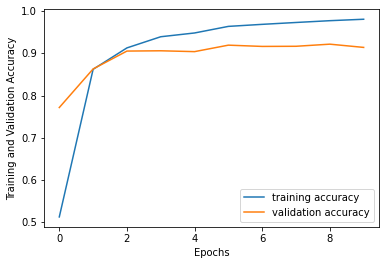

In [16]:
plt.plot(test1.history['accuracy'], label='training accuracy')
plt.plot(test1.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend(loc='lower right')

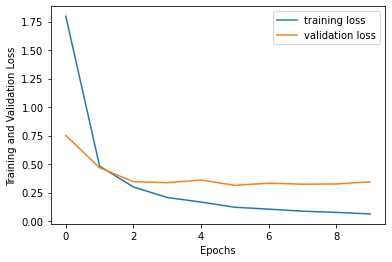

In [17]:
plt.plot(test1.history['loss'], label='training loss')
plt.plot(test1.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()

In [18]:
!nvidia-smi

Tue Apr 19 00:33:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    72W / 149W |  11077MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [113]:
testset = pd.read_csv(input_dir + '/Nature_Test_Set1.csv')
print(testset.size)
testset

16


,FileName,Label
0,51306401,21
1,67968696,4
2,23128722,11
3,49893925,35
4,53534042,9
5,86511079,26
6,49273490,3
7,67517541,31


In [114]:
testset['FileName'] = testset['FileName'].apply(lambda x: str(x) + '.jpg')
testset['Label'] = testset['Label'].apply(lambda x: str(x))
testset.head()

,FileName,Label
0,51306401.jpg,21
1,67968696.jpg,4
2,23128722.jpg,11
3,49893925.jpg,35
4,53534042.jpg,9


In [115]:
test_data_generator = ImageDataGenerator(rescale= 1./255)
testgenerator = test_data_generator.flow_from_dataframe(testset, directory=input_dir + "/Test Files", x_col='FileName', target_size=SIZE, class_mode=None, batch_size=BATCH_SIZE, shuffle=False,seed = SEED)

Found 8 validated image filenames.


In [116]:
model.load_weights(input_dir+'/Weights/xweights1.hdf5')

In [117]:
yprob = model.predict(testgenerator)

In [118]:
key= list(train_generator.class_indices.keys())
val = list(train_generator.class_indices.values())

def getpredLabel(i):
    return key[val.index(i)]

In [119]:
j = 0
for i in np.argmax(yprob,axis =-1):
    testset.loc[j,'PredLabel'] = getpredLabel(i)
    j += 1

In [120]:
testset

,FileName,Label,PredLabel
0,51306401.jpg,21,21
1,67968696.jpg,4,4
2,23128722.jpg,11,11
3,49893925.jpg,35,35
4,53534042.jpg,9,12
5,86511079.jpg,26,26
6,49273490.jpg,3,3
7,67517541.jpg,31,31


In [126]:
y = testset['Label']
y

0    21
1     4
2    11
3    35
4     9
5    26
6     3
7    31
Name: Label, dtype: object

In [132]:
acc = accuracy_score(testset['Label'], testset['PredLabel'])
print(acc)

0.875


In [136]:
p = precision_score(testset['Label'], testset['PredLabel'],average = 'weighted')
print(p)

0.875


C:\Users\sweta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
r = recall_score(testset['Label'], testset['PredLabel'],average = 'weighted')
print(r)

0.875


C:\Users\sweta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
model.evaluate(testgenerator)

AttributeError: in user code:

    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\training.py", line 1474, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\sweta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 505, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'NoneType' object has no attribute 'shape'
